## Transporte de um pulso inicial de poluição numa situação em que o vento seja constante
 Alejandro Delgado Peralta


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercicio com aproximação "forward" com Euler
Temos uma equação 

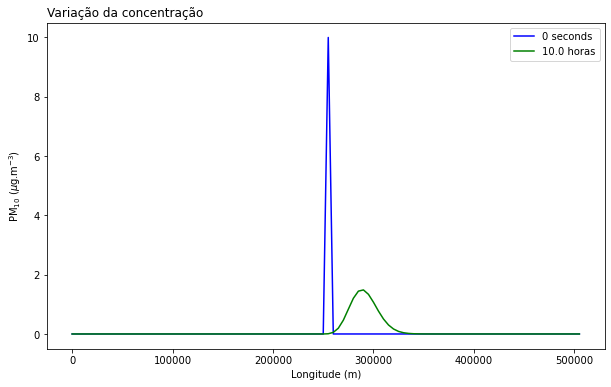

In [57]:
# Information
Nx = 101  # total points
dx = 5000 # meters
Nt = 3600*10   # time steps, assuming by me
dt = 0.1  # time lapse, assuming by me
U = 10    # m/s as wind speed
Co = 10   # ug/m3 PM10
x = np.linspace(0,Nx*dx,Nx+1)
c = np.zeros(Nx+1)

# Function for initial conditions
def Conc(i,nr):
    Conc = Co*np.exp(-(i*dx-51*dx)**2/(nr*dx)**2)
    return Conc

c[51] = Conc(51,10)

# Make a plot
fig, ax = plt.subplots(1, figsize=[10,6])
n=0
ax.plot(x,c, label=f"{n} seconds", color='b')

# Numeric solution using euler aproximation as first order
for n in range(1, Nt+1):
    cn = c.copy()
    
    for i in range(1,Nx):
        c[i] = cn[i] - U*dt/dx*(cn[i]-cn[i-1])

ax.plot(x, c, label=f"{n/3600} horas", color='g')
ax.set_ylabel("PM$_{10}$ ($\mu$g.m$^{-3}$)")
ax.set_xlabel("Longitude (m)")
ax.set_title("Variação da concentração", loc='left')
ax.legend()
plt.show()